In [ ]:
!pip install qiskit-metal
!pip install addict==2.4.0 descartes==1.1.0 gdspy==1.6.12 geopandas==0.12.2 ipython==8.10.0 matplotlib==3.7.0 numpy==1.24.2 pandas==1.5.3 pint==0.20.1 pyEPR-quantum==0.8.5.7 pygments==2.14.0 pyside2==5.15.2.1 qdarkstyle==3.1 qutip==4.7.1 scipy==1.10.0 shapely==2.0.1 scqubits==3.1.0 gmsh==4.11.1 pyaedt==0.6.46 pyyaml==6.0 cython<3.0.0

In [1]:
#pip install ezdxf

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import qiskit_metal as metal
from qiskit_metal import designs, MetalGUI
from qiskit_metal import Dict, Headings
from qiskit_metal.qlibrary.core.base import QComponent

In [21]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

In [22]:
dir(QComponent)

['TOOLTIP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__i_am_component__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_to_design',
 '_check_pin_inputs',
 '_delete_evaluation',
 '_gather_all_children_metadata',
 '_gather_all_children_options',
 '_get_specific_table_values_from_renderers',
 '_get_table_values_from_renderers',
 '_get_unique_class_name',
 '_is_name_used',
 '_register_class_with_design',
 'add_dependency',
 'add_pin',
 'add_qgeometry',
 'class_name',
 'component_metadata',
 'connect_components_already_in_design',
 'default_options',
 'delete',
 'design',
 'get_pin',
 'get_template_options',
 'id',
 'logger',
 'make',
 'name',
 'options',
 'parse_options',
 'parse_value',
 'pin_names',
 

In [23]:
# Taken from: qiskit_metal/qlibrary/user_components/my_dxf
from qiskit_metal.qlibrary.user_components.my_dxf import MyQComponent2 # MyQComponent2 is the custom QComponent name


In [24]:
design.overwrite_enabled = True

In [25]:
# We can vary how big we want the grid to be by changing N_x/N_y (number of qubits along the x/y axis). Be careful as very large arrays can take a fair bit of time to generate. We modify the chip size so it contains all of the qubits.
N_x =1
N_y =1

In [26]:
design.chips.main.size.size_x = str((N_x+1) * 3)+'mm'
design.chips.main.size.size_y = str((N_y+1) * 3)+'mm'

design.chips.main.size.center_x = str((N_x-1) * 1.5)+'mm'
design.chips.main.size.center_y = str((N_y-0.5) * 1.5)+'mm'

In [27]:
# First we generate the qubits. We use some simple math to generate the offset pattern in order to make the bus resonators easier to connect.
#Loop to generate and draw the qubits
for x in range(N_x):
    for y in range(N_y):
        options = dict(pos_x= str(x*3000)+'um', pos_y = str(y*3000 + (x%2)*1500)+'um', orientation = "-90",
                      connection_pads = dict(
                            B0 = dict(loc_W=-1, loc_H=-1, pad_width='75um'),
                            B1  = dict(loc_W=-1, loc_H=+1, pad_width='120um'),
                            B2  = dict(loc_W=+1, loc_H=-1, pad_width='120um'),
                            B3 = dict(loc_w = +1, loc_H = +1, pad_width='90um')))

        
        obj=MyQComponent2(design,'NotQuantumDot'+str(x)+'_'+str(y),options)
        
        
gui.rebuild()
gui.autoscale()

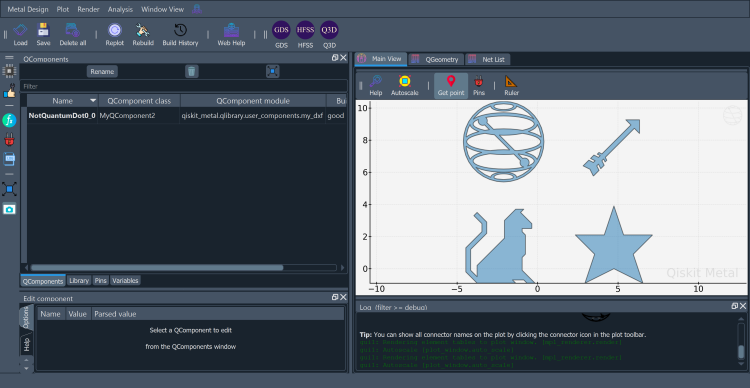

In [28]:
gui.rebuild()
gui.autoscale()
gui.screenshot()

In [29]:
#QDesign registers GDS renderer during init of QDesign.
a_gds = design.renderers.gds
# An alternate way to invoke gds commands without using a_gds:
# design.renderers.gds.export_to_gds()

#Show the options for GDS
a_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': 'False',
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': '../resources/Fake_Junctions.GDS',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '100um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '200um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [30]:
a_gds.options.no_cheese
# To add negative dots or 'cheese', simply enter the alternative code below.
# a_gds.options.cheese

{'datatype': '99',
 'buffer': '25um',
 'cap_style': '2',
 'join_style': '2',
 'view_in_file': {'main': {1: True}}}

In [31]:
a_gds.options['no_cheese']['view_in_file']['main'][1] = True
# For the 'cheese' option, where there is a presence of negative dots simply use this code instead.
# a_gds.options['cheese']['view_in_file']['main'][1] = True

In [32]:
gui.rebuild()

# Get a list of all the qcomponents in QDesign and then zoom on them.
all_component_names = design.components.keys()
gui.zoom_on_components(all_component_names)

In [33]:
# Prepare to export GDS file with negative e-beam or direct-write masks for layer 1. 
# If there are 2 or more layers, simply add a comma and specify the layer numbers.
a_gds.options['negative_mask'] = Dict(main=[1])

# Export GDS files with positive mask for layer 1.
# a_gds.options['positive_mask'] = Dict(main=[1])

10:59PM 05s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: QWindowsNativeFileDialogBase::selectNameFilter: Invalid parameter '*.gds' not found in 'All Files (*)'.

10:59PM 05s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: QWindowsNativeFileDialogBase::selectNameFilter: Invalid parameter '*.gds' not found in 'All Files (*)'.

10:59PM 11s WARNING [_qgeometry_to_gds]: Unexpected shapely object geometry.The variable qgeometry_element is <class 'numpy.float64'>, method can currently handle Polygon and FlexPath.
10:59PM 11s WARNING [_import_junction_gds_file]: Not able to find file:"../resources/Fake_Junctions.GDS".  Not used to replace junction. Checked directory:"C:\Users\ojbsn\OneDrive\Desktop___________\Downloads\Downloads\Qiskit Metal for QPU Engineering\Qiskit_Metal-dxf_import-main\resources".
10:59PM 15s WARNING [_qgeometry_to_gds]: Unexpected shapely object geometry.The variable qgeometry_element is <class 'numpy.float64'>, m